**Question 1:**
 Do the market basket analysis with Bread_Basket dataset.

In [2]:
##Importing all Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

##For Market Basket Analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [9]:
os.chdir('J:/AIML/39. 29-10-20/')

In [10]:
bb=pd.read_csv('BreadBasket_DMS - Arindam Dev.csv')

In [11]:
bb.head(8)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee


In [12]:
##First observation Shape and info
bb.shape

(21293, 4)

In [14]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [15]:
bb.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction,21293.0,4951.990889,2787.7584,1.0,2548.0,5067.0,7329.0,9684.0


In [16]:
#Checking the missing values in dataset 
bb.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [17]:
bb.nunique()

Date            159
Time           8240
Transaction    9531
Item             95
dtype: int64

**Data Pre-processing**

In [19]:
#checking is there  any 0 or negative transaction in the dataset
bb[bb['Transaction']<=0].head()

,Date,Time,Transaction,Item


### Description of Item

In [20]:
bb['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [21]:
bb['Item'].nunique()

95

**NONE VALUES**

In [22]:
##Checking  the NONE item in dataset
bb[bb['Item']=='NONE']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [23]:
#Counting the NONE Values 
bb[bb['Item']=='NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [24]:
##Droping the NONE Values in dataset
bb.drop(bb[bb['Item']=='NONE'].index,inplace=True)

In [25]:
bb.shape

(20507, 4)

In [26]:
#Counting the NONE Values 
bb[bb['Item']=='NONE'].count()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

**Feature Engineering**

In [27]:
##Adding month ,year , hour f each transaction
bb['Date'] = pd.to_datetime(bb['Date'], errors='coerce')
bb['Year'] = bb['Date'].dt.year
bb['Month'] = bb['Date'].dt.month
bb['Hour'] = bb['Date'].dt.hour

In [28]:
bb['Time']=pd.to_datetime(bb['Time'])
bb['Hour']=bb['Time'].dt.hour
bb.head()

,Date,Time,Transaction,Item,Year,Month,Hour
0,2016-10-30,2021-01-25 09:58:11,1,Bread,2016,10,9
1,2016-10-30,2021-01-25 10:05:34,2,Scandinavian,2016,10,10
2,2016-10-30,2021-01-25 10:05:34,2,Scandinavian,2016,10,10
3,2016-10-30,2021-01-25 10:07:57,3,Hot chocolate,2016,10,10
4,2016-10-30,2021-01-25 10:07:57,3,Jam,2016,10,10


In [29]:
##by Month-Year
bb['Month_year'] = pd.to_datetime(bb['Date']).dt.to_period('M')
bb.head()

,Date,Time,Transaction,Item,Year,Month,Hour,Month_year
0,2016-10-30,2021-01-25 09:58:11,1,Bread,2016,10,9,2016-10
1,2016-10-30,2021-01-25 10:05:34,2,Scandinavian,2016,10,10,2016-10
2,2016-10-30,2021-01-25 10:05:34,2,Scandinavian,2016,10,10,2016-10
3,2016-10-30,2021-01-25 10:07:57,3,Hot chocolate,2016,10,10,2016-10
4,2016-10-30,2021-01-25 10:07:57,3,Jam,2016,10,10,2016-10


In [30]:
#highest solds items in dataset
bb['Item'].value_counts().head(20)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64

In [31]:
# highest sold item of dataset
highest_sold_item =bb['Item'].value_counts().head(20)
highest_sold_item


Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

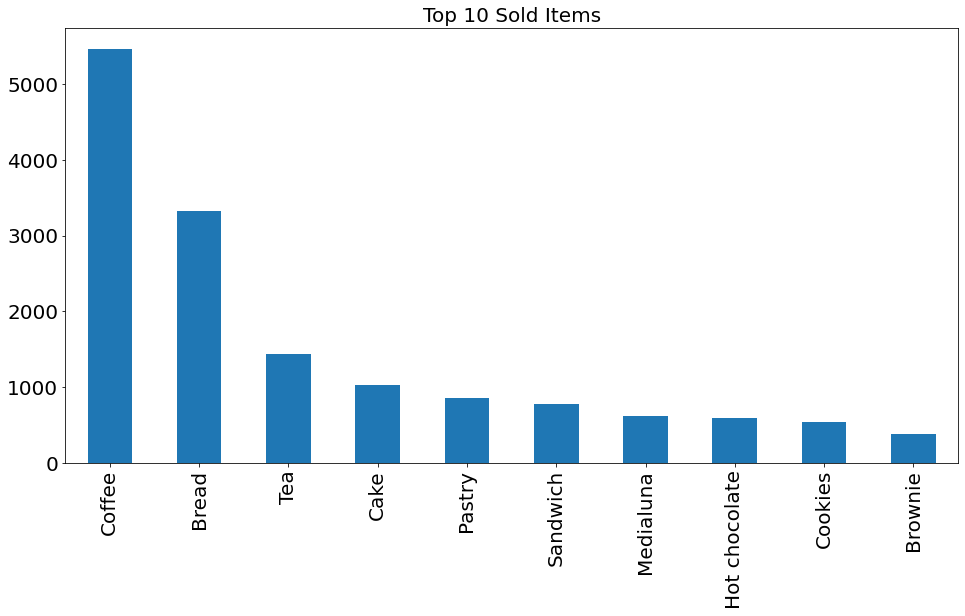

In [32]:
#ploting highest sold items

plt.figure(figsize=(16,8))
plt.title('Top 10 Sold Items',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
highest_sold_item.head(10).plot(kind='bar')
plt.show


**By seeing the above graph we got to know here coffee is the most sold product followed by bread , tea , cake an so on.**

Grouping Transaction according to month 

In [33]:
monthly_transaction = bb.groupby(['Month'])['Transaction'].nunique().sort_values(ascending=False)
monthly_transaction.head()

Month
11    2140
3     1764
12    1672
2     1630
1     1575
Name: Transaction, dtype: int64

In [34]:
##Monthly_Year 
bb.groupby(['Month_year'])['Transaction'].sum()

Month_year
2016-10       32288
2016-11     5599892
2016-12    10827910
2017-01    16519571
2017-02    25607531
2017-03    32566493
2017-04    10893297
Freq: M, Name: Transaction, dtype: int64

In [35]:
import calendar
bb['Month_name']=bb['Month'].apply(lambda x: calendar.month_name[x])

Text(0.5, 1.0, 'Monthly sales')

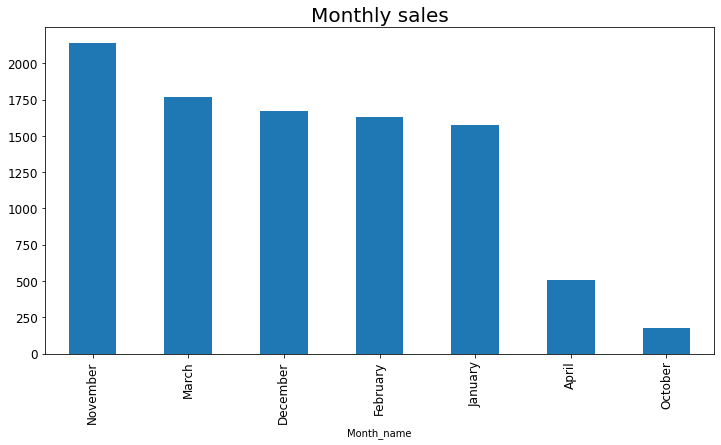

In [36]:
# monthly sales of items
bb.groupby(['Month_name'])['Transaction'].nunique().sort_values(ascending=False).plot(kind='bar',fontsize=12,figsize=(12,6))
plt.title("Monthly sales",fontsize=20)

**Here, In November month, the highest sales was made, followed by March ,December and least sales are seen in April and October.**

In [37]:
##Annual Transactions
bb.groupby('Year')['Transaction'].sum()

Year
2016    16460090
2017    85586892
Name: Transaction, dtype: int64

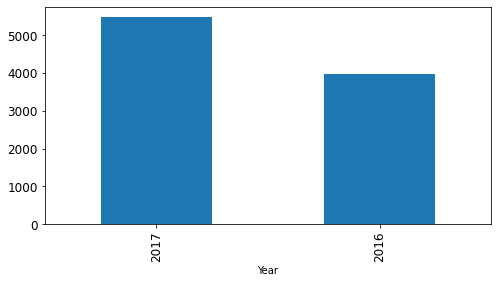

In [38]:
# Annual sales /Transactions
bb.groupby(['Year'])['Transaction'].nunique().sort_values(ascending=False)[:20].plot(kind='bar',fontsize=12,figsize=(8,4))

**In 2017 sales were high then the  previous year(2016).** 

In [39]:
# yearly unique highest Items sold
bb.groupby(['Year','Item'])['Transaction'].nunique().sort_values(ascending=False)[:20]

Year  Item         
2017  Coffee           2649
2016  Coffee           1879
2017  Bread            1790
2016  Bread            1307
2017  Tea               789
      Cake              724
2016  Tea               561
2017  Sandwich          460
      Pastry            459
2016  Pastry            356
2017  Cookies           354
2016  Medialuna         349
2017  Hot chocolate     305
2016  Cake              259
2017  Juice             258
      Scone             258
      Toast             253
2016  Hot chocolate     247
2017  Medialuna         236
      Soup              220
Name: Transaction, dtype: int64

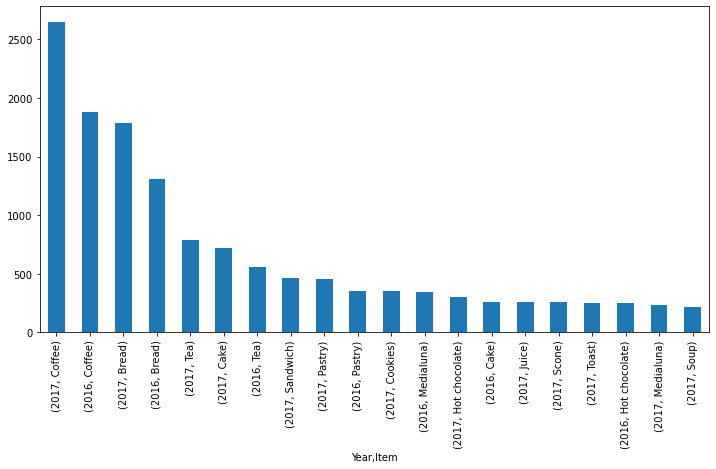

In [40]:
# yearly unique highest Items sold
bb.groupby(['Year','Item'])['Transaction'].nunique().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(12,6))

In [41]:
bb.head(8)

,Date,Time,Transaction,Item,Year,Month,Hour,Month_year,Month_name
0,2016-10-30,2021-01-25 09:58:11,1,Bread,2016,10,9,2016-10,October
1,2016-10-30,2021-01-25 10:05:34,2,Scandinavian,2016,10,10,2016-10,October
2,2016-10-30,2021-01-25 10:05:34,2,Scandinavian,2016,10,10,2016-10,October
3,2016-10-30,2021-01-25 10:07:57,3,Hot chocolate,2016,10,10,2016-10,October
4,2016-10-30,2021-01-25 10:07:57,3,Jam,2016,10,10,2016-10,October
5,2016-10-30,2021-01-25 10:07:57,3,Cookies,2016,10,10,2016-10,October
6,2016-10-30,2021-01-25 10:08:41,4,Muffin,2016,10,10,2016-10,October
7,2016-10-30,2021-01-25 10:13:03,5,Coffee,2016,10,10,2016-10,October


**Basket analysis using Apriori algorithm:**

In [42]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [43]:
bb[bb['Transaction']==5]['Item'].tolist()

['Coffee', 'Pastry', 'Bread']

In [44]:
##Create  a list of unique transactions to transform our data into correct format using Transaction Encode
tran_list= []
for i in bb['Transaction'].unique():
    t_lst = list(set(bb[bb['Transaction']==i]['Item']))
    if len(t_lst)>0:
        tran_list.append(t_lst)
len(tran_list)


9465

Above we have 9465 unique transacions 

In [45]:
##Now Transform our transaction into suitable format for our analysis 
te=TransactionEncoder()

te_array=te.fit(tran_list).transform(tran_list)

In [46]:

basket_model = pd.DataFrame(te_array, columns=te.columns_)

In [47]:
basket_model.head(5)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
popular_sets= apriori(basket_model,min_support=0.01,use_colnames=True)

In [49]:

popular_sets

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Cake, Bread, Coffee)"
59,0.011199,"(Pastry, Bread, Coffee)"


In [50]:
rules= association_rules(popular_sets,metric='lift',min_threshold=1)

In [51]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
3,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [52]:
##Sort the values by confidence to se likelihood that an item is boughtif its antecedent is bought.
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [53]:
##Condition for most positive /strong relation
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.05) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
3,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
10,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
11,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
